In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ot

from sklearn.metrics.pairwise import cosine_similarity
from functions.utils import *

In [2]:
fr_es = open('../data/raw/es-fr_1-100.wa', 'r')
alignements = transform_alignement_file(fr_es.readlines())

es_100 = open('../data/raw/1-100-final.es', 'r')
sentences_es = transform_sentence_file(es_100.readlines())

fr_100 = open('../data/raw/1-100-final.fr', 'r')
sentences_fr = transform_sentence_file(fr_100.readlines())

es_vectors = np.load('../data/processed/vector_es_100.npy',allow_pickle=True)
fr_vectors = np.load('../data/processed/vector_fr_100.npy',allow_pickle=True)

In [4]:
def analysis(Lambda_min, Lambdamax, n_lambda, n_sentences):
    ids = []
    data = []
    values = []
    lambdas = np.linspace(Lambda_min,Lambdamax,n_lambda)
    for Lambda in lambdas:
        for sentence_id in np.random.choice(n_sentences, n_sentences, replace=False).tolist():
            
            es_vector = np.asarray(es_vectors[sentence_id])
            fr_vector = np.asarray(fr_vectors[sentence_id])

            P_es = np.ones(es_vector.shape[0])*[1/es_vector.shape[0]]
            P_fr = np.ones(fr_vector.shape[0])*[1/fr_vector.shape[0]]

            cost = 1-cosine_similarity(es_vector,fr_vector)

            A = ot.sinkhorn(P_es, P_fr, cost, Lambda)

            values = values+[Lambda]*(A.shape[0]*A.shape[1])
            ids = ids+[sentence_id]*(A.shape[0]*A.shape[1])
            data = data+ A.reshape(A.shape[0]*A.shape[1]).tolist()
        
    dict = {"Lambda":values,"Id":ids,"A":data}
    df = pd.DataFrame(dict)
    return df

In [5]:
data = analysis(0.002, 1, 100, 50)

<AxesSubplot:xlabel='Lambda', ylabel='A'>

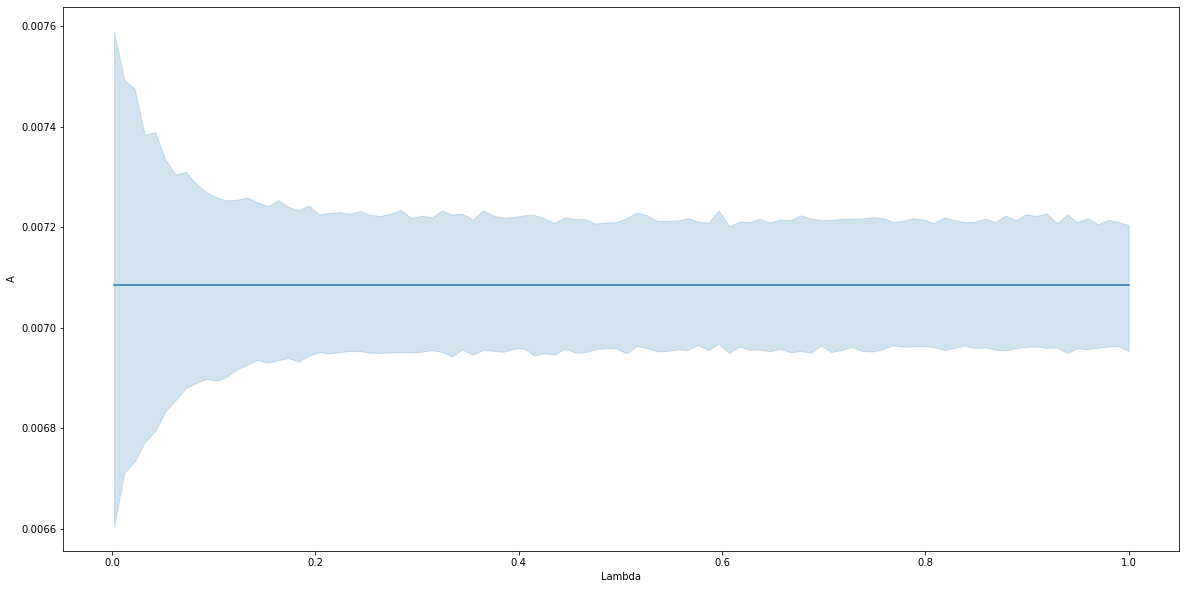

In [6]:
plt.figure(figsize=(20,10))
sns.lineplot(data=data, x="Lambda", y="A")

<AxesSubplot:xlabel='Id', ylabel='A'>

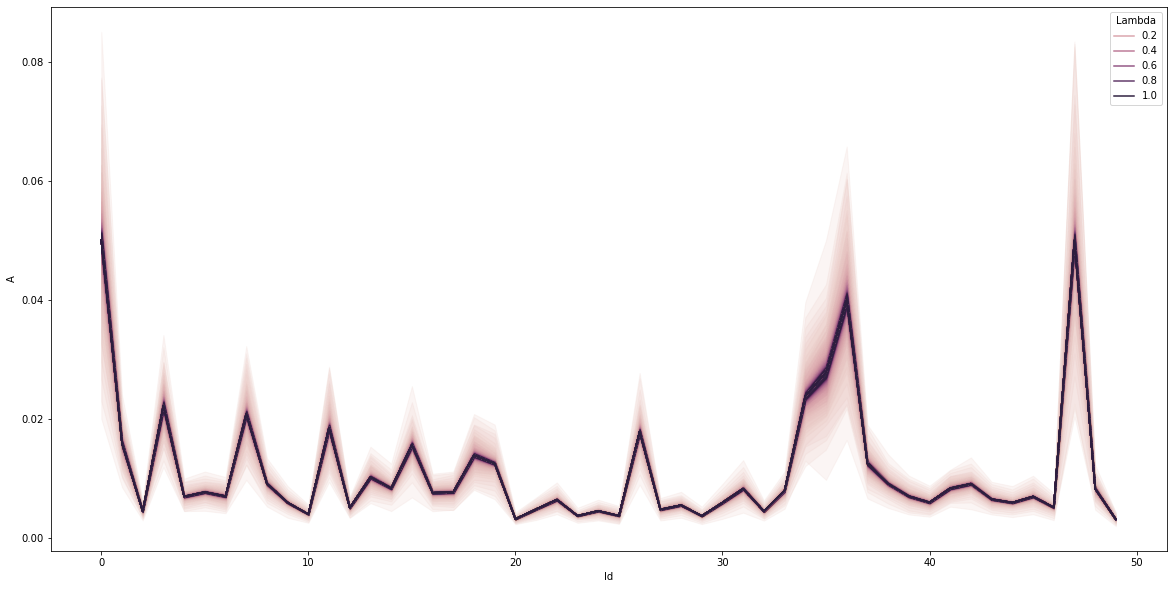

In [7]:
plt.figure(figsize=(20,10))
sns.lineplot(data=data, x="Id", y="A", hue="Lambda")

[Text(0, 0, '0.002'),
 Text(1, 0, '0.012080808080808081'),
 Text(2, 0, '0.02216161616161616'),
 Text(3, 0, '0.032242424242424246'),
 Text(4, 0, '0.042323232323232325'),
 Text(5, 0, '0.052404040404040404'),
 Text(6, 0, '0.06248484848484849'),
 Text(7, 0, '0.07256565656565657'),
 Text(8, 0, '0.08264646464646465'),
 Text(9, 0, '0.09272727272727273'),
 Text(10, 0, '0.1028080808080808'),
 Text(11, 0, '0.11288888888888889'),
 Text(12, 0, '0.12296969696969698'),
 Text(13, 0, '0.13305050505050506'),
 Text(14, 0, '0.14313131313131314'),
 Text(15, 0, '0.15321212121212122'),
 Text(16, 0, '0.1632929292929293'),
 Text(17, 0, '0.17337373737373737'),
 Text(18, 0, '0.18345454545454545'),
 Text(19, 0, '0.19353535353535353'),
 Text(20, 0, '0.2036161616161616'),
 Text(21, 0, '0.2136969696969697'),
 Text(22, 0, '0.22377777777777777'),
 Text(23, 0, '0.23385858585858585'),
 Text(24, 0, '0.24393939393939396'),
 Text(25, 0, '0.25402020202020203'),
 Text(26, 0, '0.2641010101010101'),
 Text(27, 0, '0.2741818181

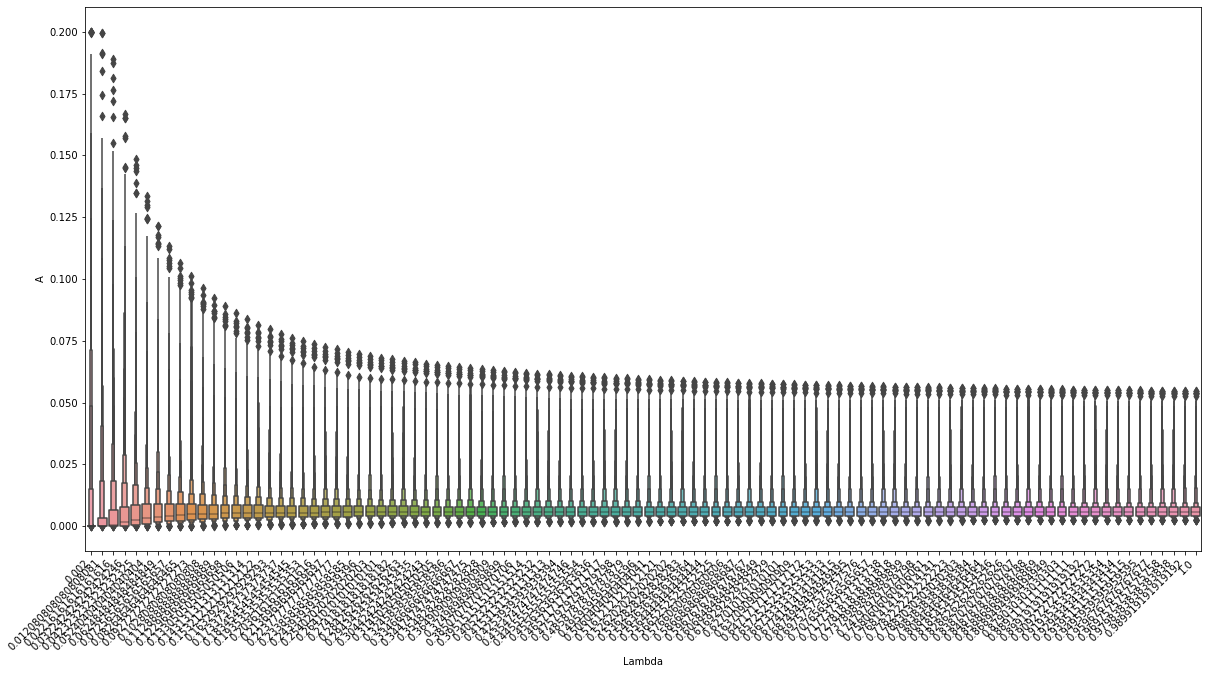

In [10]:
plt.figure(figsize=(20,10))

chart = sns.boxenplot(data=data, x="Lambda", y="A")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')